**Brian Blaylock**  
**September 26, 2019**

# `rgb.py` Demo

I have gathered several RGB recipies from the [RAMMB CIRA](http://rammb.cira.colostate.edu/training/visit/quick_guides/) website, including:

- TrueColor
- FireTemperature
- AirMass
- DayCloudPhase
- DayConvection
- DayLandCloudFire
- WaterVapor
- DaySnowFog
- etc.

These recipies are in the `make_RGB.py` file in this directory.

For more details on how to generate these plots, see the example on the [Unidata gallery](http://unidata.github.io/python-gallery/examples/mapping_GOES16_TrueColor.html#sphx-glr-examples-mapping-goes16-truecolor-py).

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from datetime import datetime
import pandas as pd

import sys
sys.path.append('../')
from goes2go.rgb import *
from goes2go.data import goes_latest, goes_nearesttime
from goes2go.tools import abi_crs

In [2]:
DATE = datetime(2020, 9, 22, 18)
G16 = goes_nearesttime(attime=DATE, satellite=16, product='ABI')
G17 = goes_nearesttime(attime=DATE, satellite=17, product='ABI')

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [1] files to [C:\Users\blaylockbk\data\noaa-goes16\ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [5]:
# Get projection object and sweeps
crs16, x16, y16 = abi_crs(G16)
crs17, x17, y17 = abi_crs(G17)

22-Sep-2020 18:01 UTC
22-Sep-2020 18:01 UTC


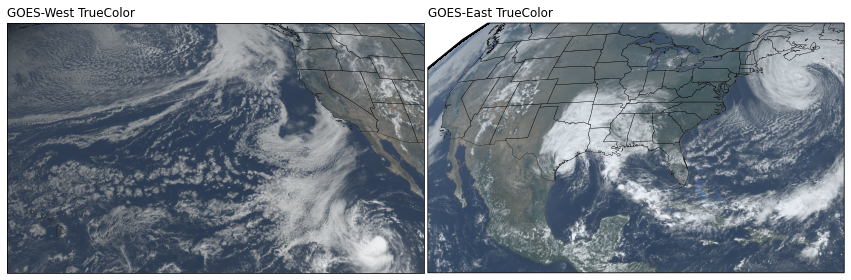

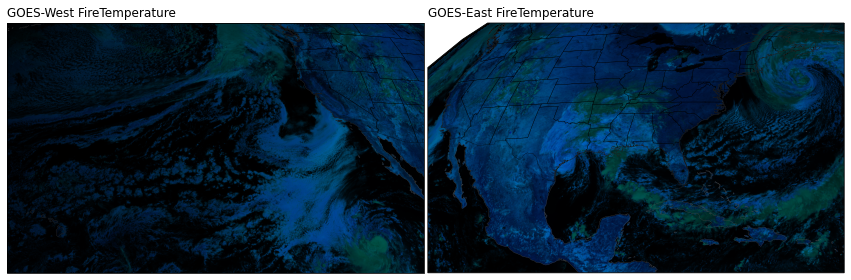

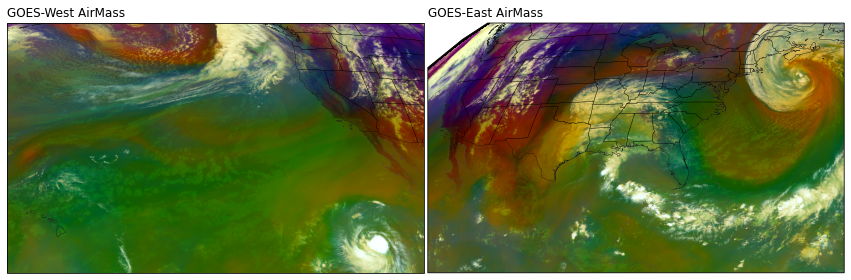

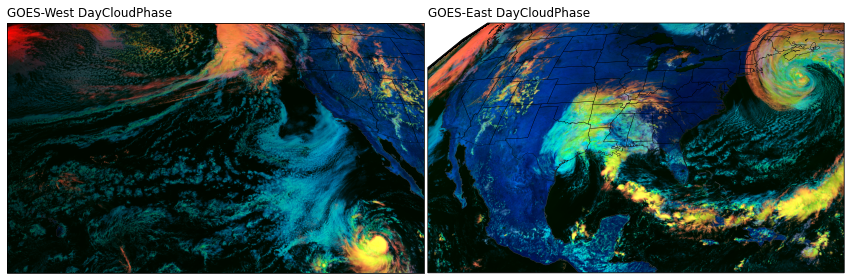

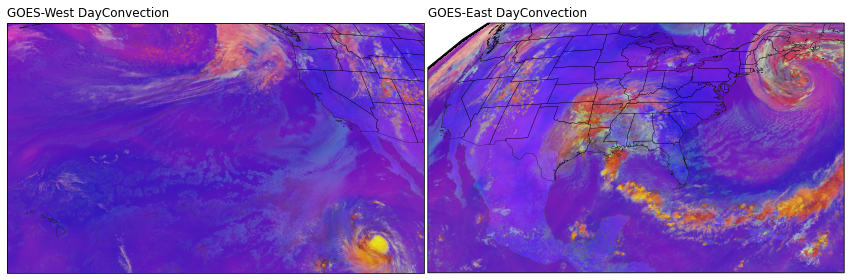

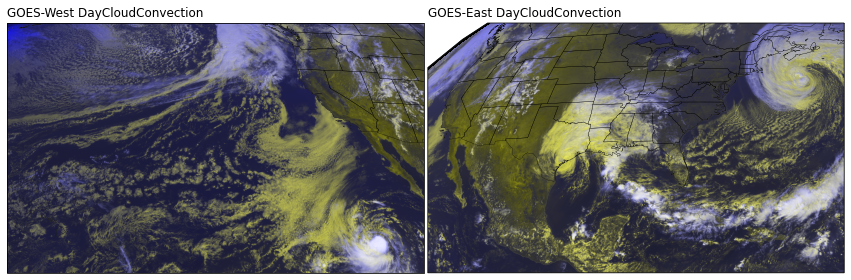

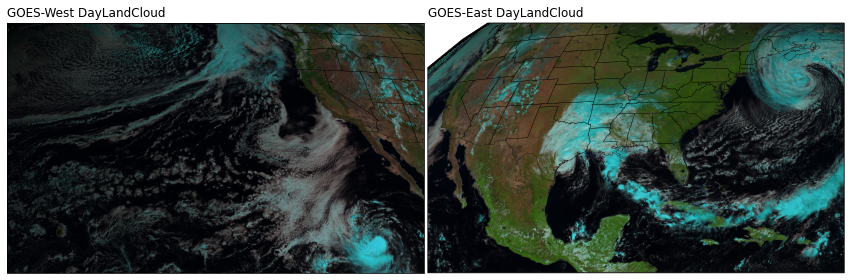

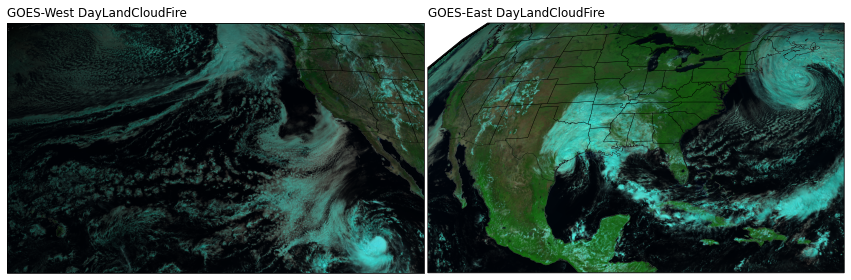

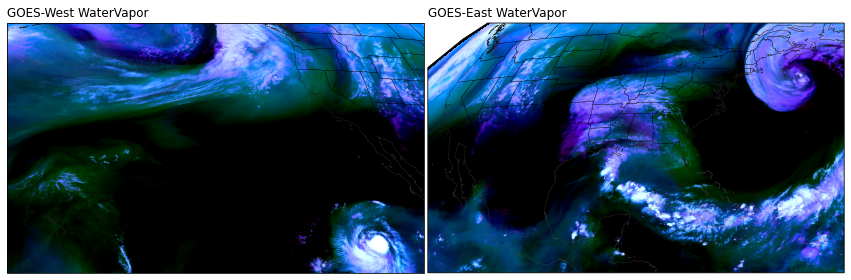

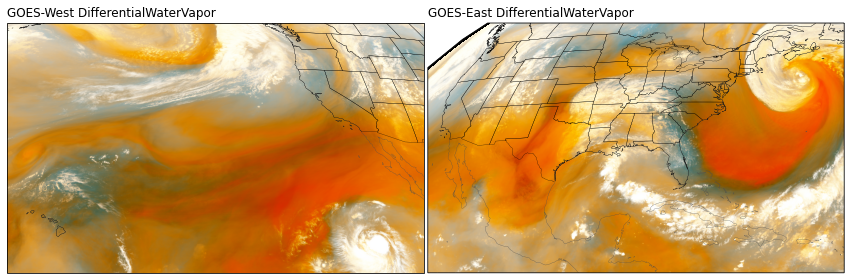

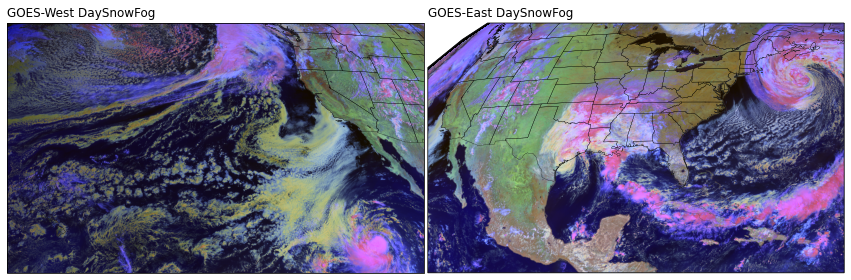

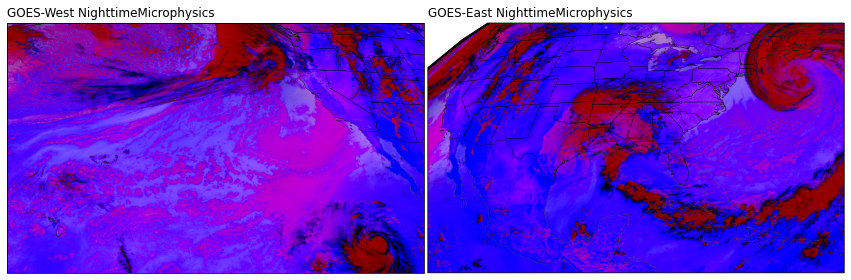

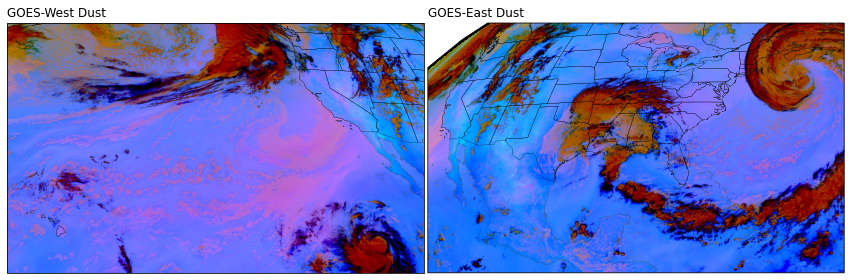

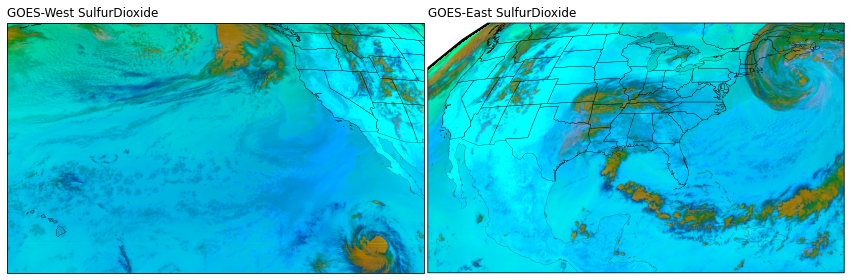

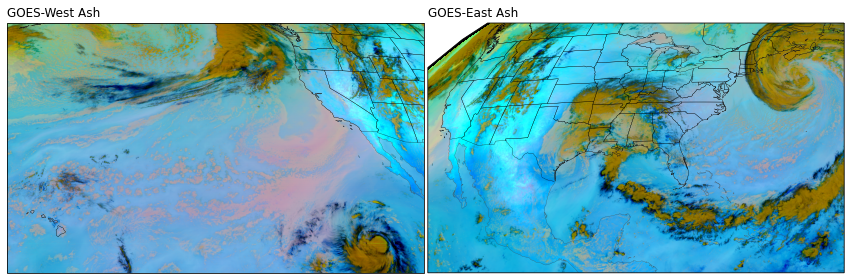

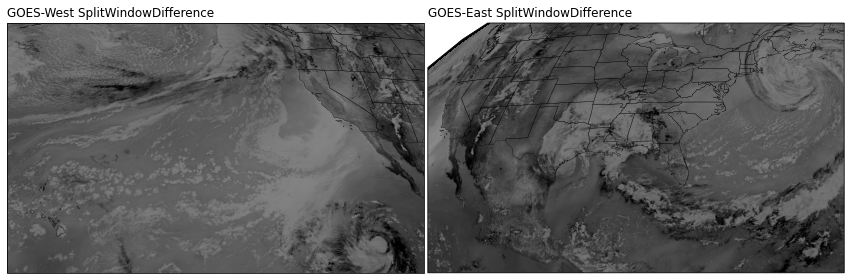

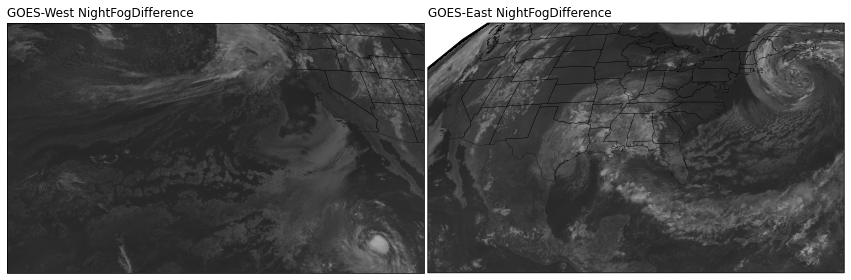

In [22]:
functions = [TrueColor, FireTemperature, AirMass, \
             DayCloudPhase, DayConvection, DayCloudConvection,\
             DayLandCloud, DayLandCloudFire, \
             WaterVapor, DifferentialWaterVapor, \
             DaySnowFog, NighttimeMicrophysics, \
             Dust, SulfurDioxide, Ash, \
             SplitWindowDifference, NightFogDifference]

str_date_16 = print(f"{pd.to_datetime(G16.time_coverage_start.item()):%d-%b-%Y %H:%M UTC}")
str_date_17 = print(f"{pd.to_datetime(G16.time_coverage_start.item()):%d-%b-%Y %H:%M UTC}")

for i, func in enumerate(functions):
    fig = plt.figure(figsize=(15, 12))

    # Create axis with Geostationary projection
    ax17 = fig.add_subplot(1, 2, 1, projection=crs17)
    ax16 = fig.add_subplot(1, 2, 2, projection=crs16)

    # GOES-West
    plt.sca(ax17)
    plt.title(f'GOES-West {func.__name__}', loc='left')
    plt.title(str_date_17, loc='right')
    plt.imshow(func(G17), origin='upper',
               extent=(x17.min(), x17.max(), y17.min(), y17.max()), transform=crs17)
    # Add Coastlines and States
    plt.gca().coastlines(resolution='50m', color='.3', linewidth=0.25)
    plt.gca().add_feature(ccrs.cartopy.feature.STATES, linewidth=0.25)
    
    # GOES-East
    plt.sca(ax16)
    plt.title(f'GOES-East {func.__name__}', loc='left')
    plt.title(str_date_16, loc='right')
    plt.imshow(func(G16), origin='upper',
               extent=(x16.min(), x16.max(), y16.min(), y16.max()), transform=crs16)
    # Add Coastlines and States
    plt.gca().coastlines(resolution='50m', color='.3', linewidth=0.25)
    plt.gca().add_feature(ccrs.cartopy.feature.STATES, linewidth=0.25)
    
    plt.subplots_adjust(wspace=0.01)